In [8]:
import random
import numpy as np
import scipy.stats as stats
from typing import List
import matplotlib.pyplot as plt

In [9]:
def isHeadArr(N):
    '''
        The isHeadArr function generates an array of boolean values representing 
        the outcomes of flipping a coin N times. 
        Each element in the array corresponds to the result of a single coin flip, 
        where True represents heads and False represents tails.
    '''
    return np.random.choice([True, False], N)

In [10]:
def numHeads(N: int) -> float:
    '''
        The numHeads function calculates the number of heads obtained from flipping a coin N times. 
        This function leverages the isHeadArr function to generate the outcomes 
        of the coin flips and then counts how many of those outcomes are heads.
    '''
    arr = isHeadArr(N)
    areHeads = arr[arr == True]
    return len(areHeads)

In [11]:
def binomTest(X, n, p_0, kind: List[str]=["one-sided","two-sided"]):
    '''
        The binomTest function performs a binomial test, which is a statistical test used to determine whether 
        the observed number of successes in a given number of trials is consistent with a specified probability 
        of success. This function leverages the binomtest function from the scipy.stats module to conduct the test.
    '''
    return stats.binomtest(X, n, p_0, alternative=kind)

In [12]:
def parse_p_values(p_values):
    '''
        The parse_p_values function processes a list of statistical test results, extracting and 
        converting specific attributes into a more accessible format. 
        This function is particularly useful for summarizing the results of multiple 
        statistical tests in a consistent and readable manner.
    '''
    parsed_results = [(result.n, result.statistic, float(result.pvalue)) for result in p_values]
    return parsed_results

In [13]:
def plot_p_values(data):
    '''
        The provided code snippet is used to visualize the relationship between p-values and two other variables, 
        n-values and statistics, using scatter plots. This is useful for understanding how p-values 
        vary with different sample sizes and test statistics. 
    '''
    # Unpack the data into three separate lists
    n_values, statistics, p_values = zip(*data)
    
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    # First plot: p_values against n_values
    axs[0].scatter(n_values, p_values, color='blue')
    axs[0].set_title('p-values vs n-values')
    axs[0].set_xlabel('n-values')
    axs[0].set_ylabel('p-values')
    
    # Second plot: p_values against statistics
    axs[1].scatter(statistics, p_values, color='red')
    axs[1].set_title('p-values vs statistics')
    axs[1].set_xlabel('statistics')
    axs[1].set_ylabel('p-values')
    
    # Show the plots
    plt.tight_layout()
    plt.show()

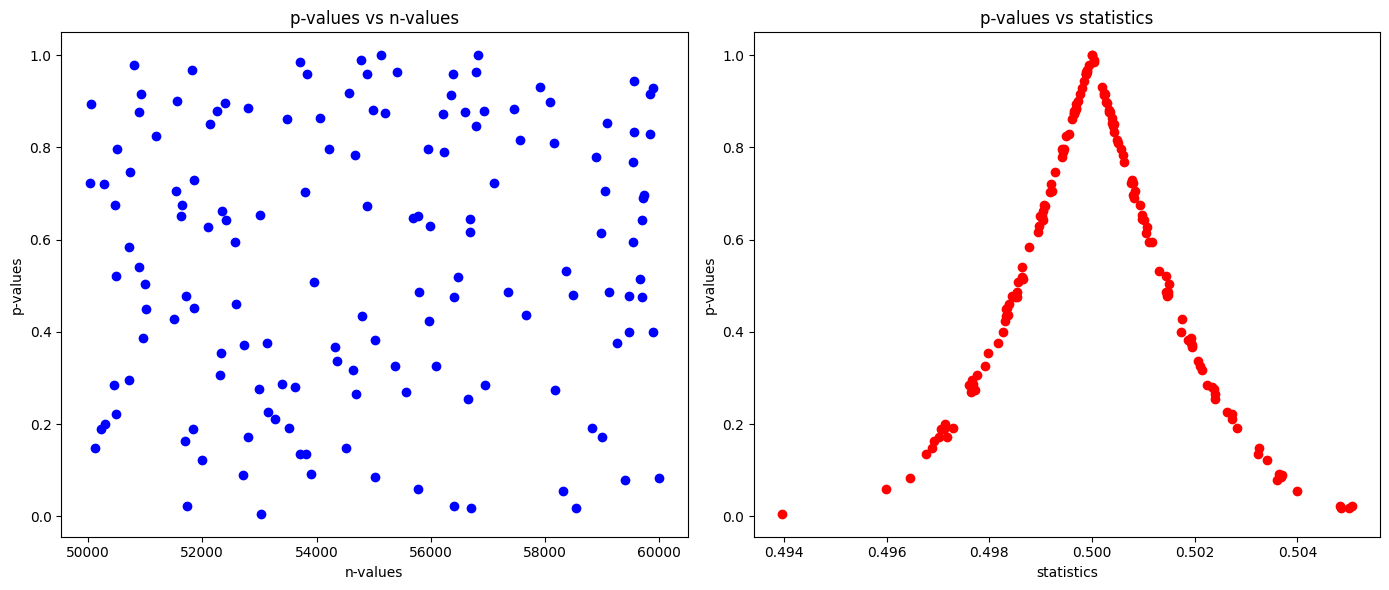

In [14]:
# Null Hypotheis is that the probability of Heads is 0.5 exactly.
'''
    A binomial test is a statistical test used to determine whether the observed proportion of successes in a binary experiment 
    (like coin flips) differs from an expected proportion under the null hypothesis.

    When to Use the Binomial Test?
        Your data consists of two possible outcomes (e.g., success/failure, heads/tails, yes/no).
        You want to test whether the observed proportion of successes pobs matches an expected probabiilty p0.
        The number of trials is fixed and each trial is independent.
'''
exp_prob = 0.5 # this is null-hypothesis, p_0 = 0.5
random_numbers = np.random.randint(50000, 60000, size=150)
num_heads = np.vectorize(lambda num: numHeads(num))(random_numbers)
typeOfAltHypothesis = "two-sided" # coin is biased to p_0 != 0.5
p_values = np.vectorize(lambda X, n: binomTest(X, n, exp_prob, kind=typeOfAltHypothesis))(num_heads, random_numbers)
parsed_p_values = parse_p_values(p_values)
plot_p_values(parsed_p_values)